In [ ]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 17.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tickers=["RELIANCE.NS"]

In [ ]:
stock_data=yf.download(tickers,start="2012-01-01")
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,345.128540,351.542725,340.348846,349.957764,323.036804,8679938
2012-01-03,352.780975,360.037201,351.839905,358.922760,331.312073,9455771
2012-01-04,360.284851,362.043182,353.325836,354.712677,327.425873,8557084
2012-01-05,354.143066,359.071350,343.791199,346.465851,319.813477,13364666
2012-01-06,345.252350,358.600830,345.054230,355.406097,328.065979,9495456
...,...,...,...,...,...,...
2022-07-22,2500.000000,2516.300049,2495.000000,2503.100098,2503.100098,5062651
2022-07-25,2467.449951,2467.449951,2403.000000,2420.399902,2420.399902,10665470
2022-07-26,2421.100098,2443.899902,2411.350098,2421.500000,2421.500000,5216466


# Data understanding

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2608 entries, 2012-01-02 to 2022-07-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2608 non-null   float64
 1   High       2608 non-null   float64
 2   Low        2608 non-null   float64
 3   Close      2608 non-null   float64
 4   Adj Close  2608 non-null   float64
 5   Volume     2608 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.6 KB


In [ ]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2.608000e+03
mean,1014.375513,1026.098093,1002.065120,1013.574748,998.248246,8.596319e+06
std,707.468999,715.744994,698.444495,706.688554,713.807580,6.081543e+06
min,334.330872,338.194244,333.365021,334.875702,309.114929,0.000000e+00
25%,444.715797,449.736938,439.626534,444.845802,424.559914,5.198418e+06
50%,660.167267,664.451660,652.651031,658.161285,641.310669,6.908652e+06
75%,1391.794647,1415.631256,1375.511505,1399.013763,1389.311096,9.724292e+06
max,2856.149902,2856.149902,2786.100098,2819.850098,2819.850098,6.584835e+07


**Here the Maximum value of share in Open column is 2856.149902 and minimum value 78.152176.
     the Maximum value of share in High column is 2856.149902 and minimum value 78.894859 	.
     the Maximum value of share in Low column is 2786.100098 and minimum value 77.610634.
     the Maximum value of share in Close column is 2819.850098 	 and minimum value 66.971481.**

In [ ]:
stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
Skewness_df=pd.DataFrame({"Feature":["Open","High","Low","Close","Adje Close","Volume"],
                         "Skewness":[stock_data.Open.skew(),stock_data.High.skew(),stock_data.Low.skew(),
                                    stock_data.Close.skew(),stock_data["Adj Close"].skew(),stock_data.Volume.skew()]})
Skewness_df

,Feature,Skewness
0,Open,0.967807
1,High,0.967123
2,Low,0.969539
3,Close,0.968275
4,Adje Close,0.966949
5,Volume,3.591341


In [ ]:
new_stock_data=stock_data[["Close"]]
new_stock_data

,Close
Date,
2012-01-02,349.957764
2012-01-03,358.922760
2012-01-04,354.712677
2012-01-05,346.465851
2012-01-06,355.406097
...,...
2022-07-22,2503.100098
2022-07-25,2420.399902
2022-07-26,2421.500000


In [ ]:
series=new_stock_data.reset_index()
series

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097
...,...,...
2603,2022-07-22,2503.100098
2604,2022-07-25,2420.399902
2605,2022-07-26,2421.500000
2606,2022-07-27,2419.199951


In [ ]:
series.head()

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097


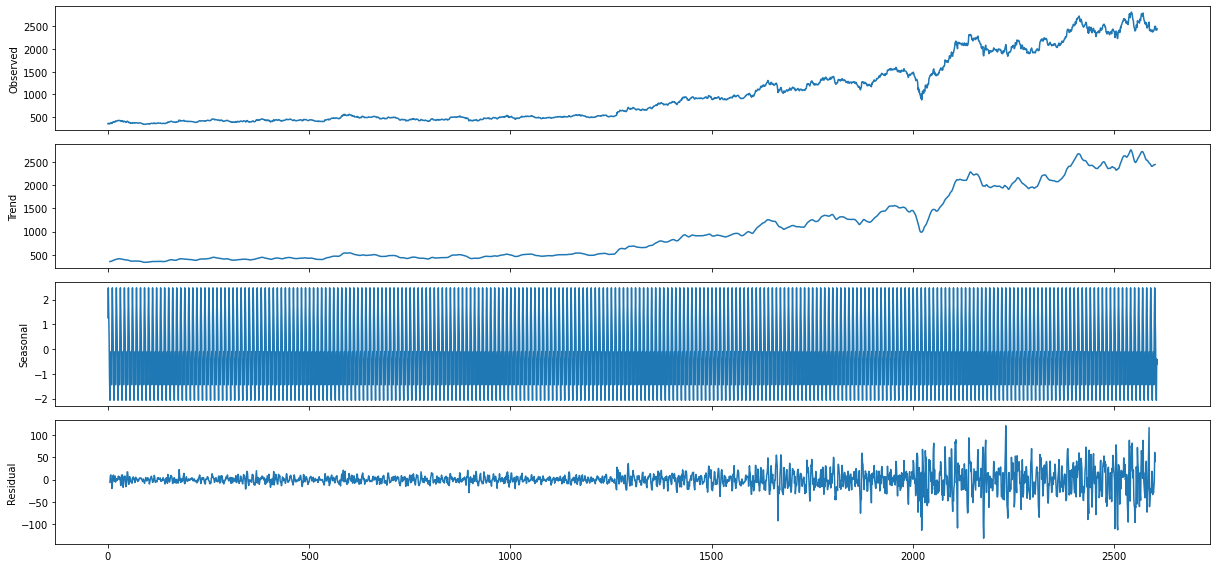

In [ ]:
rcParams['figure.figsize'] = 17,8
decomposition =seasonal_decompose(series.Close,freq=10)
fig = decomposition.plot()
plt.show()

# Visualization

In [ ]:
fig = px.line(x=series.Date,y=series.Close,labels={"x":"Date","y":"Closing price"})
fig.show()

In [ ]:
fig = px.box(x=series.Date,y=series.Close,labels={"x":"Year","y":"Closing price"})
fig.show()

In [ ]:
fig=px.bar(series,x=series.Date,y="Close")
fig.show()

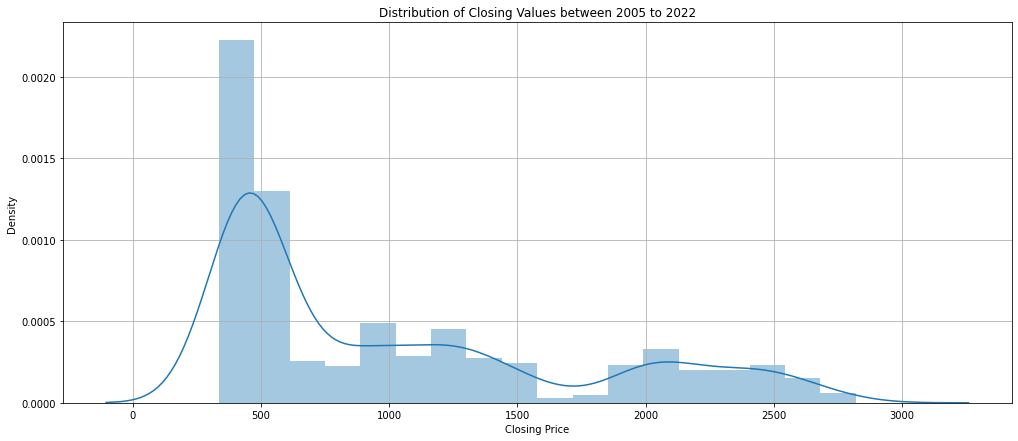

In [ ]:
plt.figure(figsize=(17,7))
sns.distplot(series.Close)
plt.title("Distribution of Closing Values between 2005 to 2022")
plt.xlabel("Closing Price")
plt.grid(True)
plt.show()

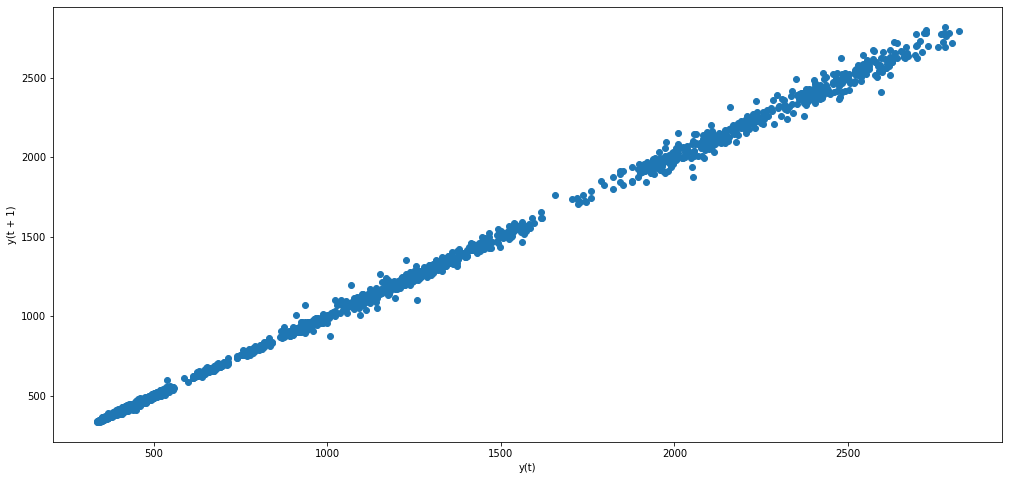

In [ ]:
lag_plot(series.Close)

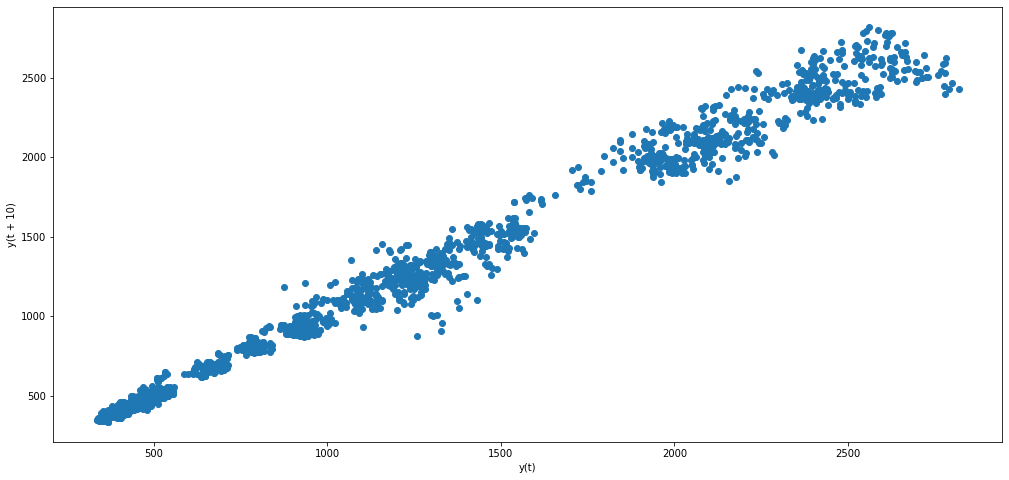

In [ ]:
lag_plot(series.Close,lag=10)

# Data Preprocessing

In [ ]:
series.shape

(2608, 2)

In [ ]:
series

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097
...,...,...
2603,2022-07-22,2503.100098
2604,2022-07-25,2420.399902
2605,2022-07-26,2421.500000
2606,2022-07-27,2419.199951


In [ ]:
(20/100)*len(series),(80/100)*len(series)

(521.6, 2086.4)

In [ ]:
y=np.round((20/100)*len(series),0)
y=int(y)
y

522

In [ ]:
x=np.round((80/100)*len(series),0)
x=int(x)
x

2086

In [ ]:
train=series.head(x)
test=series.tail(y)
train.shape,test.shape

((2086, 2), (522, 2))

In [ ]:
train.head()

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097


In [ ]:
test.head()

,Date,Close
2086,2020-06-29,1723.150024
2087,2020-06-30,1704.099976
2088,2020-07-01,1737.599976
2089,2020-07-02,1760.349976
2090,2020-07-03,1787.900024


### Defining Error Functions

In [ ]:
def RMSE(actual,pred):
    temp=np.sqrt(np.mean((actual-pred)**2))
    return temp
def MAPE(pred,actual):
    temp=np.mean(np.abs((pred-actual)/actual)*100)
    return temp

* Creating moving averages

In [ ]:
moving_avg_20=series.Close.rolling(20).mean()     # mean of first 20 values and put it in 21 th observation and so on..
moving_avg_20[20]

374.17321319580077

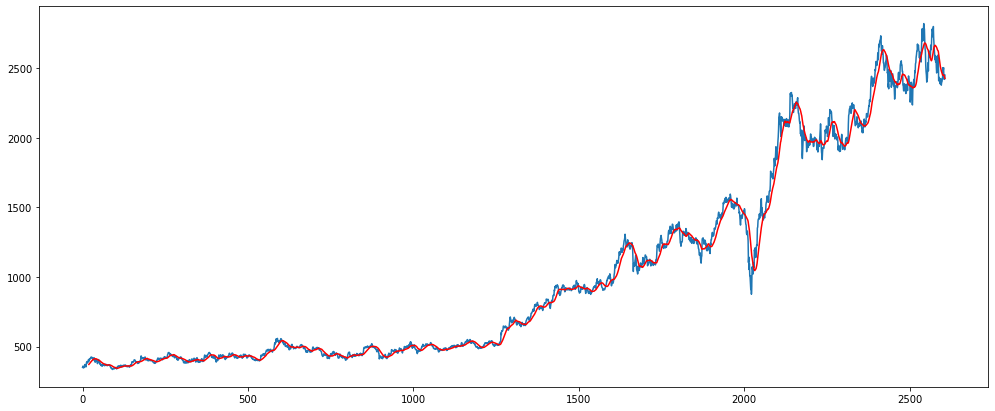

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(series.Close)
plt.plot(moving_avg_20,color="red")
plt.show()

In [ ]:
train.shape,test.shape

((2086, 2), (522, 2))

In [ ]:
train

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097
...,...,...
2081,2020-06-22,1746.150024
2082,2020-06-23,1720.900024
2083,2020-06-24,1727.849976
2084,2020-06-25,1717.900024


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(series[["Close"]].values)
scaled_train=scaler.fit_transform(train[["Close"]].values)
scaled_test=scaler.fit_transform(test[["Close"]].values)
scaled_train

array([[0.01058744],
       [0.01688076],
       [0.01392533],
       ...,
       [0.97785222],
       [0.97086747],
       [0.9875397 ]])

In [ ]:
len(scaled_train),len(scaled_test),len(scaled_data),scaled_data.shape

(2086, 522, 2608, (2608, 1))

In [ ]:
x_train=[]
y_train=[]

for i in range(20,len(scaled_train)):
  x_train.append(scaled_train[i-20:i])
  y_train.append(scaled_train[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
x_train

array([[[0.01058744],
        [0.01688076],
        [0.01392533],
        ...,
        [0.03993319],
        [0.05017291],
        [0.04125443]],

       [[0.01688076],
        [0.01392533],
        [0.00813615],
        ...,
        [0.05017291],
        [0.04125443],
        [0.0490255 ]],

       [[0.01392533],
        [0.00813615],
        [0.01441211],
        ...,
        [0.04125443],
        [0.0490255 ],
        [0.05392804]],

       ...,

       [[0.77968086],
        [0.79842392],
        [0.79291333],
        ...,
        [1.        ],
        [0.99069865],
        [0.97297343]],

       [[0.79842392],
        [0.79291333],
        [0.83218956],
        ...,
        [0.99069865],
        [0.97297343],
        [0.97785222]],

       [[0.79291333],
        [0.83218956],
        [0.84296507],
        ...,
        [0.97297343],
        [0.97785222],
        [0.97086747]]])

In [ ]:
x_train.shape ,len(x_train)  # 1474= Rows , 20=columns because first 20 values have become columns for prediction of y_train. 1 is for univariate that is Close 

((2066, 20, 1), 2066)

## Model Building

In [ ]:
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))  #x_train.shape[1]=20, 1 is for Close column
model.add(Dropout(0.1))
model.add(LSTM(units=60,activation="relu",return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=80,activation="relu",return_sequences=True))  
model.add(Dropout(0.3))
model.add(LSTM(units=120,activation="relu"))  
model.add(Dropout(0.4))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 20, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 20, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer="adam",loss="mse")
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
65/65 [==============================] - 9s 60ms/step - loss: 0.0258
Epoch 2/100
65/65 [==============================] - 4s 63ms/step - loss: 0.0051
Epoch 3/100
65/65 [==============================] - 6s 91ms/step - loss: 0.0043
Epoch 4/100
65/65 [==============================] - 7s 103ms/step - loss: 0.0036
Epoch 5/100
65/65 [==============================] - 7s 105ms/step - loss: 0.0037
Epoch 6/100
65/65 [==============================] - 8s 124ms/step - loss: 0.0041
Epoch 7/100
65/65 [==============================] - 7s 107ms/step - loss: 0.0030
Epoch 8/100
65/65 [==============================] - 7s 101ms/step - loss: 0.0031
Epoch 9/100
65/65 [==============================] - 5s 79ms/step - loss: 0.0028
Epoch 10/100
65/65 [==============================] - 4s 62ms/step - loss: 0.0030
Epoch 11/100
65/65 [==============================] - 4s 63ms/step - loss: 0.0031
Epoch 12/100
65/65 [==============================] - 4s 63ms/step - loss: 0.0031
Epoch 13/100
65/65 [

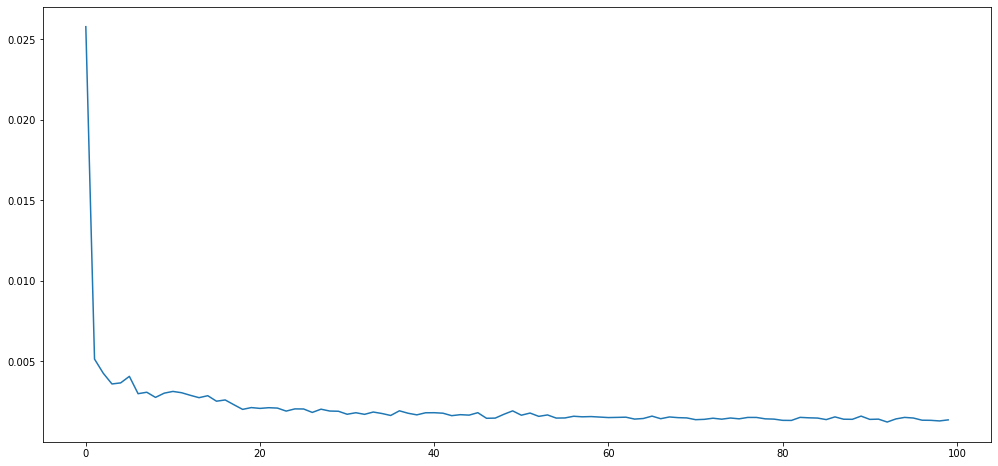

In [ ]:
loss=model.history.history["loss"]
plt.plot(loss)
plt.show()

In [ ]:
#model.save("LSTM_model")

### Testing

In [ ]:
test.head()

,Date,Close
2086,2020-06-29,1723.150024
2087,2020-06-30,1704.099976
2088,2020-07-01,1737.599976
2089,2020-07-02,1760.349976
2090,2020-07-03,1787.900024


Here for the prediction of test dataset, we need previous 50 data points so that out y will be the first value of test dataset. and that previous values are the last values of training dataset. So we have to fetch that last training values.and append it on test dataset.

In [ ]:
train.tail(20)

,Date,Close
2066,2020-06-01,1520.349976
2067,2020-06-02,1535.699951
2068,2020-06-03,1541.650024
2069,2020-06-04,1579.800049
2070,2020-06-05,1581.699951
2071,2020-06-08,1569.500000
2072,2020-06-09,1537.150024
2073,2020-06-10,1572.150024
2074,2020-06-11,1537.699951
2075,2020-06-12,1588.800049


In [ ]:
past_20_train_values=train[["Close"]].tail(20)

In [ ]:
final_df=past_20_train_values.append(test,ignore_index=True)
final_df

,Close,Date
0,1520.349976,NaT
1,1535.699951,NaT
2,1541.650024,NaT
3,1579.800049,NaT
4,1581.699951,NaT
...,...,...
537,2503.100098,2022-07-22
538,2420.399902,2022-07-25
539,2421.500000,2022-07-26
540,2419.199951,2022-07-27


In [ ]:
test.shape

(522, 2)

In [ ]:
scaled_final_test_data=scaler.fit_transform(final_df[["Close"]])
scaled_final_test_data

array([[0.        ],
       [0.01181222],
       [0.01639096],
       [0.04574842],
       [0.04721044],
       [0.03782225],
       [0.01292809],
       [0.03986152],
       [0.01335127],
       [0.05267416],
       [0.07248947],
       [0.0749134 ],
       [0.07310503],
       [0.10430938],
       [0.18395539],
       [0.17375916],
       [0.15432861],
       [0.15967678],
       [0.15202003],
       [0.17029629],
       [0.15606005],
       [0.14140053],
       [0.16717967],
       [0.1846864 ],
       [0.2058869 ],
       [0.25505967],
       [0.23324351],
       [0.2136591 ],
       [0.23385917],
       [0.27525975],
       [0.31908425],
       [0.30523277],
       [0.24905733],
       [0.24859563],
       [0.30115424],
       [0.30746442],
       [0.34721049],
       [0.37218159],
       [0.41358216],
       [0.48156973],
       [0.48930351],
       [0.50584834],
       [0.44347816],
       [0.45286654],
       [0.4207388 ],
       [0.37602923],
       [0.48499428],
       [0.466

In [ ]:
len(scaled_final_test_data),scaled_final_test_data.shape

(542, (542, 1))

In [ ]:
x_test=[]
y_test=[]

for i in range(20,len(scaled_final_test_data)):
  x_test.append(scaled_final_test_data[i-20:i])
  y_test.append(scaled_final_test_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [ ]:
x_test.shape,y_test.shape

((522, 20, 1), (522,))

## Predictions

In [ ]:
y_pred_test=model.predict(x_test)
y_pred_test

array([[0.15466237],
       [0.16959445],
       [0.183225  ],
       [0.19522762],
       [0.20552826],
       [0.21453473],
       [0.2225334 ],
       [0.22900543],
       [0.23376858],
       [0.23764716],
       [0.23746175],
       [0.24227922],
       [0.25249138],
       [0.26223844],
       [0.2694069 ],
       [0.27556005],
       [0.281128  ],
       [0.2871061 ],
       [0.29571548],
       [0.30851316],
       [0.33220768],
       [0.37136376],
       [0.41866475],
       [0.44956297],
       [0.4610619 ],
       [0.45914036],
       [0.44939828],
       [0.44025558],
       [0.43779728],
       [0.4438196 ],
       [0.45607588],
       [0.46529537],
       [0.47031933],
       [0.471517  ],
       [0.469653  ],
       [0.46547306],
       [0.45892358],
       [0.45355713],
       [0.45268863],
       [0.45177072],
       [0.4484563 ],
       [0.44454944],
       [0.44044697],
       [0.44159353],
       [0.445787  ],
       [0.45048398],
       [0.4503299 ],
       [0.447

In [ ]:
y_pred_test_df=pd.DataFrame(y_pred_test,columns=["y_pred_test"])
y_pred_test_df

,y_pred_test
0,0.154662
1,0.169594
2,0.183225
3,0.195228
4,0.205528
...,...
517,0.739301
518,0.756503
519,0.752522
520,0.735621


In [ ]:
original_y_pred_test=scaler.inverse_transform(y_pred_test_df)
original_y_pred_test

array([[1721.3337],
       [1740.738 ],
       [1758.4508],
       [1774.0483],
       [1787.4341],
       [1799.1378],
       [1809.5321],
       [1817.9425],
       [1824.1323],
       [1829.1726],
       [1828.9315],
       [1835.1919],
       [1848.4625],
       [1861.1288],
       [1870.4443],
       [1878.4403],
       [1885.6758],
       [1893.4443],
       [1904.6323],
       [1921.263 ],
       [1952.054 ],
       [2002.9373],
       [2064.4048],
       [2104.5571],
       [2119.5   ],
       [2117.003 ],
       [2104.3433],
       [2092.4622],
       [2089.2676],
       [2097.0935],
       [2113.0205],
       [2125.0012],
       [2131.53  ],
       [2133.0864],
       [2130.664 ],
       [2125.2324],
       [2116.7212],
       [2109.7476],
       [2108.619 ],
       [2107.426 ],
       [2103.1191],
       [2098.042 ],
       [2092.711 ],
       [2094.201 ],
       [2099.6501],
       [2105.754 ],
       [2105.5537],
       [2101.2275],
       [2099.671 ],
       [2101.1853],


In [ ]:
y_pred_test.shape

(522, 1)

In [ ]:
y_test

array([0.15606005, 0.14140053, 0.16717967, 0.1846864 , 0.2058869 ,
       0.25505967, 0.23324351, 0.2136591 , 0.23385917, 0.27525975,
       0.31908425, 0.30523277, 0.24905733, 0.24859563, 0.30115424,
       0.30746442, 0.34721049, 0.37218159, 0.41358216, 0.48156973,
       0.48930351, 0.50584834, 0.44347816, 0.45286654, 0.4207388 ,
       0.37602923, 0.48499428, 0.4664101 , 0.47229709, 0.48180063,
       0.46133133, 0.47206619, 0.46729516, 0.46302425, 0.45667566,
       0.43939982, 0.46033091, 0.47033476, 0.44378609, 0.43208932,
       0.44278566, 0.4322817 , 0.47475953, 0.45421321, 0.45848393,
       0.43120425, 0.43624469, 0.46775677, 0.4553675 , 0.42854942,
       0.43270479, 0.45151987, 0.49326669, 0.61073486, 0.61515964,
       0.60192382, 0.61446714, 0.6188534 , 0.59899958, 0.60434775,
       0.56598696, 0.53158897, 0.54671028, 0.50854168, 0.52431698,
       0.53551363, 0.55767603, 0.54944214, 0.54243937, 0.53239701,
       0.5309735 , 0.5672566 , 0.55321274, 0.54874945, 0.55151

In [ ]:
original_y_test_df=pd.DataFrame(y_test,columns=["y_test"])
original_y_test_df

,y_test
0,0.156060
1,0.141401
2,0.167180
3,0.184686
4,0.205887
...,...
517,0.756252
518,0.692612
519,0.693459
520,0.691689


In [ ]:
original_y_test=scaler.inverse_transform(original_y_test_df)
original_y_test

array([[1723.15002441],
       [1704.09997559],
       [1737.59997559],
       [1760.34997559],
       [1787.90002441],
       [1851.80004883],
       [1823.44995117],
       [1798.        ],
       [1824.25      ],
       [1878.05004883],
       [1935.        ],
       [1917.        ],
       [1844.        ],
       [1843.40002441],
       [1911.69995117],
       [1919.90002441],
       [1971.55004883],
       [2004.        ],
       [2057.80004883],
       [2146.14990234],
       [2156.19995117],
       [2177.69995117],
       [2096.64990234],
       [2108.85009766],
       [2067.10009766],
       [2009.        ],
       [2150.60009766],
       [2126.44995117],
       [2134.10009766],
       [2146.44995117],
       [2119.85009766],
       [2133.80004883],
       [2127.60009766],
       [2122.05004883],
       [2113.80004883],
       [2091.35009766],
       [2118.55004883],
       [2131.55004883],
       [2097.05004883],
       [2081.85009766],
       [2095.75      ],
       [2082.100

Scaling up

In [ ]:
#scaler.scale_

In [ ]:
#1/scaler.scale_

In [ ]:
#scale_factor=1/scaler.scale_
#y_pred_test=y_pred_test*scale_factor
#y_test=y_test*scale_factor

In [ ]:
#y_pred_test

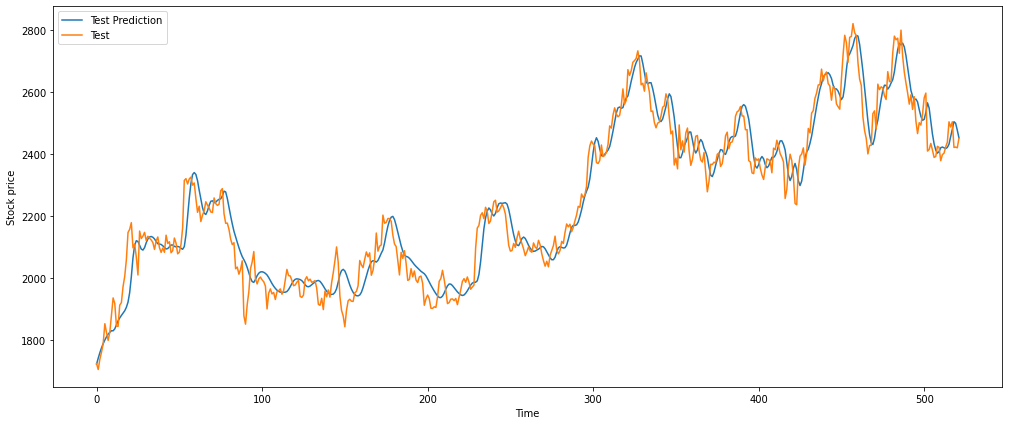

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(original_y_pred_test,label="Test Prediction")
plt.plot(original_y_test,label="Test")
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.legend()
plt.show()

In [ ]:
test.shape

(522, 2)

In [ ]:
y_pred_test_df=pd.DataFrame(original_y_pred_test,columns=["Test_Predictions"],index=test.index)
y_pred_test_df

,Test_Predictions
2086,1721.333740
2087,1740.738037
2088,1758.450806
2089,1774.048340
2090,1787.434082
...,...
2603,2481.071777
2604,2503.426270
2605,2498.252197
2606,2476.289062


In [ ]:
test_df=pd.DataFrame(original_y_test,columns=["Test_values"],index=test.index)
test_df

,Test_values
2086,1723.150024
2087,1704.099976
2088,1737.599976
2089,1760.349976
2090,1787.900024
...,...
2603,2503.100098
2604,2420.399902
2605,2421.500000
2606,2419.199951


In [ ]:
final_test_df=test_df.join(y_pred_test_df)
final_test_df

,Test_values,Test_Predictions
2086,1723.150024,1721.333740
2087,1704.099976,1740.738037
2088,1737.599976,1758.450806
2089,1760.349976,1774.048340
2090,1787.900024,1787.434082
...,...,...
2603,2503.100098,2481.071777
2604,2420.399902,2503.426270
2605,2421.500000,2498.252197
2606,2419.199951,2476.289062


In [ ]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 2086 to 2607
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Test_values       522 non-null    float64
 1   Test_Predictions  522 non-null    float32
dtypes: float32(1), float64(1)
memory usage: 6.2 KB


In [ ]:
fig=px.line(final_test_df,x=final_test_df.index,y=final_test_df.columns[0:2],labels={"Price":"Numbers"})
fig.show()

In [ ]:
RMSE=RMSE(final_test_df.Test_values,final_test_df.Test_Predictions)
RMSE

61.83358951634787

In [ ]:
MAPE=MAPE (final_test_df.Test_values,final_test_df.Test_Predictions)
MAPE

2.131442772226686

## Appying model on whole dataset

In [ ]:
scaled_data

array([[0.0060693 ],
       [0.00967698],
       [0.00798277],
       ...,
       [0.8396965 ],
       [0.83877092],
       [0.85096422]])

In [ ]:
X=[]
Y=[]

for i in range(20,len(scaled_data)):
  X.append(scaled_data[i-20:i])
  Y.append(scaled_data[i,0])

X,Y=np.array(X),np.array(Y)

In [ ]:
X.shape,Y.shape,scaled_data.shape

((2588, 20, 1), (2588,), (2608, 1))

In [ ]:
1869-20

1849

In [ ]:
X

array([[[0.0060693 ],
        [0.00967698],
        [0.00798277],
        ...,
        [0.02289191],
        [0.02876188],
        [0.02364932]],

       [[0.00967698],
        [0.00798277],
        [0.00466409],
        ...,
        [0.02876188],
        [0.02364932],
        [0.02810412]],

       [[0.00798277],
        [0.00466409],
        [0.00826181],
        ...,
        [0.02364932],
        [0.02810412],
        [0.03091453]],

       ...,

       [[0.88243334],
        [0.90354018],
        [0.90977766],
        ...,
        [0.86577325],
        [0.8725339 ],
        [0.8392538 ]],

       [[0.90354018],
        [0.90977766],
        [0.83454552],
        ...,
        [0.8725339 ],
        [0.8392538 ],
        [0.8396965 ]],

       [[0.90977766],
        [0.83454552],
        [0.83655761],
        ...,
        [0.8392538 ],
        [0.8396965 ],
        [0.83877092]]])

In [ ]:
y_pred=model.predict(X)
y_pred

array([[0.05477619],
       [0.05575976],
       [0.0568043 ],
       ...,
       [0.8711989 ],
       [0.8607769 ],
       [0.85105604]], dtype=float32)

In [ ]:
y_pred.shape

(2588, 1)

In [ ]:
Y

array([0.02810412, 0.03091453, 0.03052585, ..., 0.8396965 , 0.83877092,
       0.85096422])

In [ ]:
y_df=pd.DataFrame(Y,columns=["Close"])
y_df.head(2)

,Close
0,0.028104
1,0.030915


In [ ]:
Actual_y=scaler.inverse_transform(y_df)
Actual_y

array([[1556.87127986],
       [1560.5234071 ],
       [1560.01832211],
       ...,
       [2611.53567743],
       [2610.33288285],
       [2626.17808319]])

In [ ]:
y_pred

array([[0.05477619],
       [0.05575976],
       [0.0568043 ],
       ...,
       [0.8711989 ],
       [0.8607769 ],
       [0.85105604]], dtype=float32)

In [ ]:
y_pred_df=pd.DataFrame(y_pred,columns=["Predicted_y"])
y_pred_df

,Predicted_y
0,0.054776
1,0.055760
2,0.056804
3,0.057928
4,0.059180
...,...
2583,0.868804
2584,0.876349
2585,0.871199
2586,0.860777


In [ ]:
predicted_y=scaler.inverse_transform(y_pred_df)
predicted_y

array([[1591.5317],
       [1592.8097],
       [1594.1672],
       ...,
       [2652.473 ],
       [2638.9294],
       [2626.2974]], dtype=float32)

In [ ]:
s=series[20:]
s

,Date,Close
20,2012-01-31,404.713715
21,2012-02-01,411.697510
22,2012-02-02,410.731659
23,2012-02-03,415.214172
24,2012-02-06,412.589081
...,...,...
2603,2022-07-22,2503.100098
2604,2022-07-25,2420.399902
2605,2022-07-26,2421.500000
2606,2022-07-27,2419.199951


In [ ]:
y_pred_df=pd.DataFrame(predicted_y,columns=["Predictions"])
y_pred_df

,Predictions
0,1591.531738
1,1592.809692
2,1594.167236
3,1595.627319
4,1597.254028
...,...
2583,2649.360352
2584,2659.165039
2585,2652.472900
2586,2638.929443


In [ ]:
Y_df=pd.DataFrame(Actual_y,columns=["Actual"])
Y_df

,Actual
0,1556.871280
1,1560.523407
2,1560.018322
3,1562.362421
4,1560.989648
...,...
2583,2654.207882
2584,2610.960389
2585,2611.535677
2586,2610.332883


In [ ]:
final_prediction_df=Y_df.join(y_pred_df)
final_prediction_df

,Actual,Predictions
0,1556.871280,1591.531738
1,1560.523407,1592.809692
2,1560.018322,1594.167236
3,1562.362421,1595.627319
4,1560.989648,1597.254028
...,...,...
2583,2654.207882,2649.360352
2584,2610.960389,2659.165039
2585,2611.535677,2652.472900
2586,2610.332883,2638.929443


In [ ]:
fig=px.line(final_prediction_df,x=final_prediction_df.index,y=final_prediction_df.columns[0:2],labels={"Price":"Numbers"})
fig.show()

In [ ]:
#RMSE1=RMSE(final_prediction_df.Actual,final_prediction_df.Predictions)
#RMSE1

In [ ]:
#MAPE=MAPE(final_prediction_df.Predictions,final_prediction_df.Actual)
#MAPE

## Prediction of new data points

In [ ]:
#get the quote
data=yf.download(tickers,start="2015-01-01")
data
#create new dataframe
new_df = data.filter(['Close'])
#get the last 100 days close price value and covert the data frame into array
last_20_days = new_df[-20:].values
#scale the values between 0 to 1
last_20_days_scaled = scaler.transform(last_20_days)
#create empty list
x_test = []
#append the past 100 days 
x_test.append(last_20_days_scaled)
#convert the x test data into numpy array
x_test = np.array(x_test)
#reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
#get the predicted scaled price 
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[2439.6204]]


In [ ]:
type(pred_price)

numpy.ndarray

In [ ]:
data1=yf.download(tickers,start="2022-07-28")
data1

print(data1['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-07-28    2447.5
Name: Close, dtype: float64


In [ ]:
last_20_days = new_df[-20:].values
last_20_days

array([[2408.69995117],
       [2413.69995117],
       [2433.25      ],
       [2411.85009766],
       [2388.10009766],
       [2391.39990234],
       [2423.89990234],
       [2420.44995117],
       [2377.55004883],
       [2397.14990234],
       [2401.80004883],
       [2422.25      ],
       [2437.10009766],
       [2503.        ],
       [2486.30004883],
       [2503.10009766],
       [2420.39990234],
       [2421.5       ],
       [2419.19995117],
       [2446.10009766]])

In [ ]:
new_predictions=new_df.tail(20).values  #dates= 29-06-2022  - 26-07-2022
new_predictions

array([[2408.69995117],
       [2413.69995117],
       [2433.25      ],
       [2411.85009766],
       [2388.10009766],
       [2391.39990234],
       [2423.89990234],
       [2420.44995117],
       [2377.55004883],
       [2397.14990234],
       [2401.80004883],
       [2422.25      ],
       [2437.10009766],
       [2503.        ],
       [2486.30004883],
       [2503.10009766],
       [2420.39990234],
       [2421.5       ],
       [2419.19995117],
       [2446.10009766]])

In [ ]:
new_predictions=np.array(new_predictions)

In [ ]:
type(new_predictions)

numpy.ndarray

In [ ]:
new_pred_df=pd.DataFrame(new_predictions,columns=["new_Predictions"])
new_pred_df

,new_Predictions
0,2408.699951
1,2413.699951
2,2433.250000
3,2411.850098
4,2388.100098
5,2391.399902
6,2423.899902
7,2420.449951
8,2377.550049
9,2397.149902


In [ ]:
new_val=pred_price.tolist()
new_val

[[2439.620361328125]]

In [ ]:
type(new_val)

list

In [ ]:
#new_pewdictions.extend(pred_price)
new_arr = np.append(new_predictions, pred_price)
new_arr

array([2408.69995117, 2413.69995117, 2433.25      , 2411.85009766,
       2388.10009766, 2391.39990234, 2423.89990234, 2420.44995117,
       2377.55004883, 2397.14990234, 2401.80004883, 2422.25      ,
       2437.10009766, 2503.        , 2486.30004883, 2503.10009766,
       2420.39990234, 2421.5       , 2419.19995117, 2446.10009766,
       2439.62036133])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2439.3586]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2408.69995117, 2413.69995117, 2433.25      , 2411.85009766,
       2388.10009766, 2391.39990234, 2423.89990234, 2420.44995117,
       2377.55004883, 2397.14990234, 2401.80004883, 2422.25      ,
       2437.10009766, 2503.        , 2486.30004883, 2503.10009766,
       2420.39990234, 2421.5       , 2419.19995117, 2446.10009766,
       2439.62036133, 2439.35864258])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2408.699951
1,2413.699951
2,2433.250000
3,2411.850098
4,2388.100098
5,2391.399902
6,2423.899902
7,2420.449951
8,2377.550049
9,2397.149902


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2444.9226]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2408.69995117, 2413.69995117, 2433.25      , 2411.85009766,
       2388.10009766, 2391.39990234, 2423.89990234, 2420.44995117,
       2377.55004883, 2397.14990234, 2401.80004883, 2422.25      ,
       2437.10009766, 2503.        , 2486.30004883, 2503.10009766,
       2420.39990234, 2421.5       , 2419.19995117, 2446.10009766,
       2439.62036133, 2439.35864258, 2444.92260742])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2408.699951
1,2413.699951
2,2433.250000
3,2411.850098
4,2388.100098
5,2391.399902
6,2423.899902
7,2420.449951
8,2377.550049
9,2397.149902


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2452.4456]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2408.69995117, 2413.69995117, 2433.25      , 2411.85009766,
       2388.10009766, 2391.39990234, 2423.89990234, 2420.44995117,
       2377.55004883, 2397.14990234, 2401.80004883, 2422.25      ,
       2437.10009766, 2503.        , 2486.30004883, 2503.10009766,
       2420.39990234, 2421.5       , 2419.19995117, 2446.10009766,
       2439.62036133, 2439.35864258, 2444.92260742, 2452.44555664])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2408.699951
1,2413.699951
2,2433.250000
3,2411.850098
4,2388.100098
5,2391.399902
6,2423.899902
7,2420.449951
8,2377.550049
9,2397.149902


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2460.5193]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2408.69995117, 2413.69995117, 2433.25      , 2411.85009766,
       2388.10009766, 2391.39990234, 2423.89990234, 2420.44995117,
       2377.55004883, 2397.14990234, 2401.80004883, 2422.25      ,
       2437.10009766, 2503.        , 2486.30004883, 2503.10009766,
       2420.39990234, 2421.5       , 2419.19995117, 2446.10009766,
       2439.62036133, 2439.35864258, 2444.92260742, 2452.44555664,
       2460.51928711])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2408.699951
1,2413.699951
2,2433.250000
3,2411.850098
4,2388.100098
5,2391.399902
6,2423.899902
7,2420.449951
8,2377.550049
9,2397.149902


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2468.826]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2408.69995117, 2413.69995117, 2433.25      , 2411.85009766,
       2388.10009766, 2391.39990234, 2423.89990234, 2420.44995117,
       2377.55004883, 2397.14990234, 2401.80004883, 2422.25      ,
       2437.10009766, 2503.        , 2486.30004883, 2503.10009766,
       2420.39990234, 2421.5       , 2419.19995117, 2446.10009766,
       2439.62036133, 2439.35864258, 2444.92260742, 2452.44555664,
       2460.51928711, 2468.82592773])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2408.699951
1,2413.699951
2,2433.250000
3,2411.850098
4,2388.100098
5,2391.399902
6,2423.899902
7,2420.449951
8,2377.550049
9,2397.149902


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2477.221]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2408.69995117, 2413.69995117, 2433.25      , 2411.85009766,
       2388.10009766, 2391.39990234, 2423.89990234, 2420.44995117,
       2377.55004883, 2397.14990234, 2401.80004883, 2422.25      ,
       2437.10009766, 2503.        , 2486.30004883, 2503.10009766,
       2420.39990234, 2421.5       , 2419.19995117, 2446.10009766,
       2439.62036133, 2439.35864258, 2444.92260742, 2452.44555664,
       2460.51928711, 2468.82592773, 2477.22094727])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2408.699951
1,2413.699951
2,2433.250000
3,2411.850098
4,2388.100098
5,2391.399902
6,2423.899902
7,2420.449951
8,2377.550049
9,2397.149902


In [ ]:
df2=new_df.tail(20)
df2

,Close
Date,
2022-07-01,2408.699951
2022-07-04,2413.699951
2022-07-05,2433.250000
2022-07-06,2411.850098
2022-07-07,2388.100098
2022-07-08,2391.399902
2022-07-11,2423.899902
2022-07-12,2420.449951
2022-07-13,2377.550049


In [ ]:
df2=pd.DataFrame(df2.values,columns=["Actual"])
df2

,Actual
0,2408.699951
1,2413.699951
2,2433.250000
3,2411.850098
4,2388.100098
5,2391.399902
6,2423.899902
7,2420.449951
8,2377.550049
9,2397.149902


In [ ]:
future_pred=new_arr_df[20:]
future_pred

,Pred
20,2439.620361
21,2439.358643
22,2444.922607
23,2452.445557
24,2460.519287
25,2468.825928
26,2477.220947


In [ ]:
series.tail()

,Date,Close
2603,2022-07-22,2503.100098
2604,2022-07-25,2420.399902
2605,2022-07-26,2421.500000
2606,2022-07-27,2419.199951
2607,2022-07-28,2449.500000


In [ ]:
np.arange((len(series)),(len(series)+7))

array([2608, 2609, 2610, 2611, 2612, 2613, 2614])

In [ ]:
series_future_df=future_pred.set_index(np.arange((len(series)),(len(series)+7)))
series_future_df

,Pred
2608,2439.620361
2609,2439.358643
2610,2444.922607
2611,2452.445557
2612,2460.519287
2613,2468.825928
2614,2477.220947


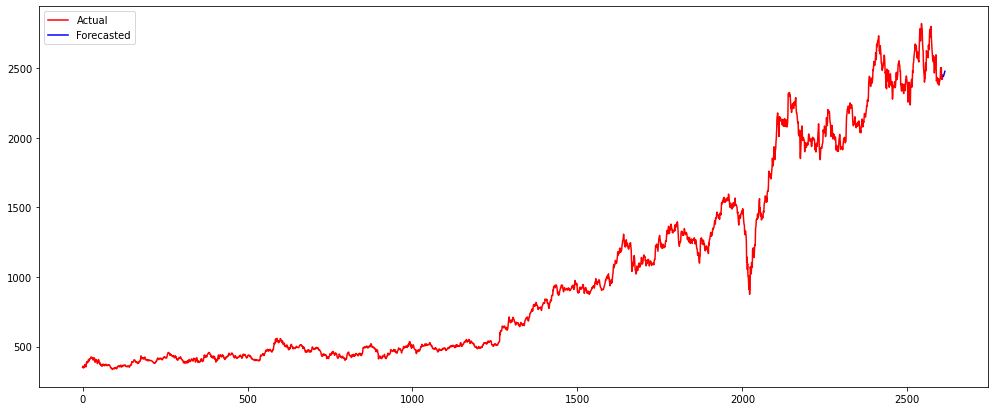

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(series.Close,label="Actual",color="red")
plt.plot(series_future_df,label="Forecasted",color="blue")
plt.legend()
plt.show()

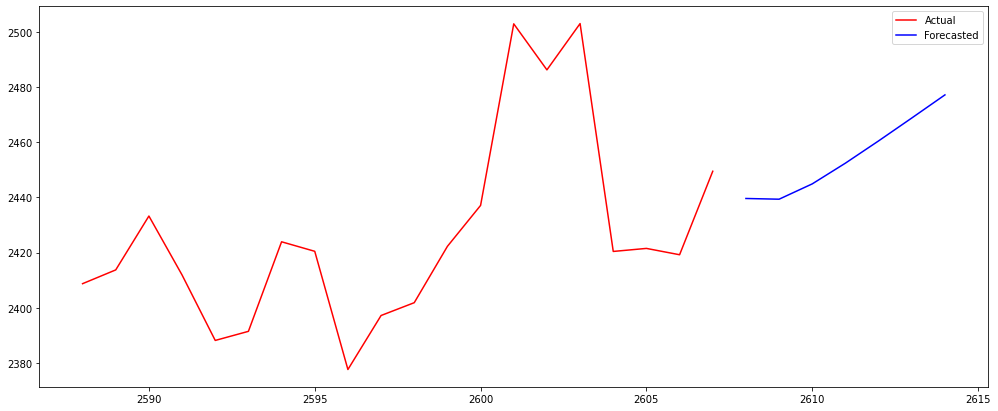

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(series[["Close"]].tail(20),label="Actual",color="red")
plt.plot(series_future_df,label="Forecasted",color="blue")
plt.legend()
plt.show()